# Training

---

In this notebook demonstrates how to train DQN Agent implemented in [Deep-RL-Navigation-Project GitHub](https://github.com/nabacg/deep-rl-navigation-project.git) repository.  


Since all python files are kept in /src subfolder, we need to first add it to Path so Python can find them.

In [1]:
import sys
sys.path.append('src')

Execute necessary imports 

In [2]:
import os
from dqn_agent import Agent, train_agent, test_agent
from unityagents import UnityEnvironment

Next, we will start the environment! Here we assume that the environment file was downloaded, unziped and copied to main folder of this repository. If not adjust the file_name argument accordingly. 

In [3]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Create the Agent object 

In the next code cell, we will instantiate object of Agent class imported from dqn_agent module. We will use state_size and action_size values from environment.  

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

## 4. Train agent 
Using agent and env objects we just created and train_agent helper method from dqn_agent we can easily start training agent for 2000 episodes or until mean score over 100 episode window is above 13. Finally output_weights parameter allows us to define where model weights should be saved after training is finished.

Function returns list of scores for each episode, which we can later use for plotting.

In [7]:
scores = train_agent(agent, 
            env,
            output_weights= "new_model_weights.pth",
            target_mean_score=13.0, 
            n_episodes=2000)

Episode 100	Average Score: 0.58
Episode 200	Average Score: 2.60
Episode 300	Average Score: 6.03
Episode 400	Average Score: 10.08
Episode 500	Average Score: 11.07
Episode 600	Average Score: 12.14
Episode 628	Average Score: 13.02Target mean score of 13.00 achived at 13.02 after 628 episodes.
Saving model weights to new_model_weights.pth


As we can see, the minimum Average score of 13 was achived just after 628 episodes! 

## 5. Plot scores

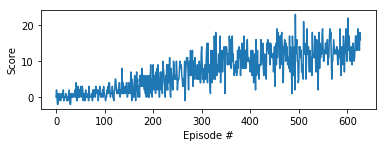

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

scores = scores
fig = plt.figure()
ax = fig.add_subplot(212)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

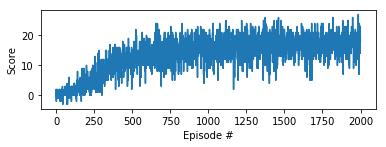

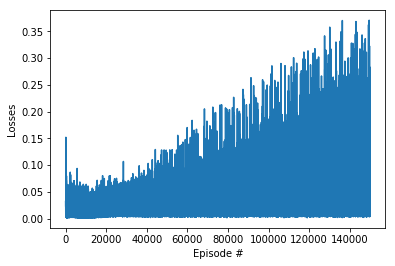

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(212)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

ax2 = fig.add_subplot(122)
plt.plot(np.arange(len(agent.loss_track)), agent.loss_track)
plt.ylabel('Losses')
plt.xlabel('Episode #')
plt.show()


In [9]:
eps = 1.0
eps_decay=0.995
eps_end=0.01
n_episodes = 2000
scores = []
scores_window = deque(maxlen=100)  # last 100 scores
for i_episode in range(1,n_episodes+1):
    
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    scores_window.append(score)
    scores.append(score)
    
    eps = max(eps_end, eps_decay*eps)
    mean_score = np.mean(scores_window)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_score), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_score))
    if mean_score >= 17.5 and i_episode % 100 == 0:
        print("saving score")
#     print("Score: {}".format(score))
        torch.save(agent.qnetwork_local.state_dict(), 'new_checkpoint_priorizedER_v2_14_14.pth')
        break

Episode 100	Average Score: 0.50
Episode 200	Average Score: 2.56
Episode 300	Average Score: 5.63
Episode 400	Average Score: 9.71
Episode 500	Average Score: 11.61
Episode 600	Average Score: 13.15
Episode 700	Average Score: 14.07
Episode 800	Average Score: 14.41
Episode 900	Average Score: 15.23
Episode 1000	Average Score: 15.83
Episode 1100	Average Score: 16.02
Episode 1200	Average Score: 16.64
Episode 1300	Average Score: 16.31
Episode 1400	Average Score: 16.67
Episode 1500	Average Score: 17.03
Episode 1600	Average Score: 16.67
Episode 1700	Average Score: 16.88
Episode 1800	Average Score: 16.75
Episode 1900	Average Score: 17.31
Episode 2000	Average Score: 17.23
